<IPython.core.display.Javascript object>


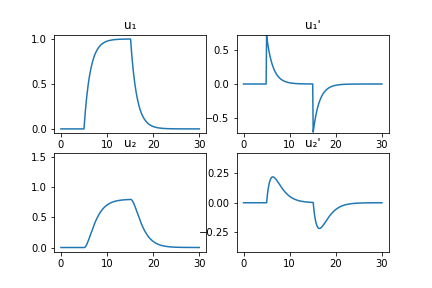

interactive(children=(FloatSlider(value=1.5, description='tau', max=4.5, min=-1.5), FloatSlider(value=1.5, des…

<function __main__.update(tau, weight)>

In [23]:
import matplotlib.pyplot as plt
%matplotlib notebook
from ipywidgets import *


def x(t):
    if 5 <= t <= 15:
        return 1
    else:
        return 0


def u1dot(t, u1_t, tau):
    return (1 / tau) * (-u1_t + x(t))


def u2dot(t, u2_t, y1_t, tau, weight):
    return (1 / tau) * (-u2_t + weight * y1_t)


def lin_model(tau, weight):
    delta_t = 0.1
    u1 = [0] * int(30 / delta_t + 2)
    u1_dot = [0] * int(30 / delta_t + 1)
    u2 = [0] * int(30 / delta_t + 2)
    u2_dot = [0] * int(30 / delta_t + 1)
    t = [0] * int(30 / delta_t + 1)

    for n in range(0, int(30 / delta_t + 1)):
        t[n] = n * delta_t
        u1_dot[n] = u1dot(n * delta_t, u1[n], tau)
        u1[n + 1] = u1[n] + delta_t * u1_dot[n]
        u2_dot[n] = u2dot(n * delta_t, u2[n], u1[n], tau, weight)
        u2[n + 1] = u2[n] + delta_t * u2_dot[n]

    del u1[-1]
    del u2[-1]
    return t, u1_dot, u2_dot, u1, u2


t, u1_dot, u2_dot, u1, u2 = lin_model(1.5, 1.5)

plt.subplot(2, 2, 1)
plt.title("u₁")
plot_u1, = plt.plot(t, u1)

plt.subplot(2, 2, 2)
plt.title("u₁'")
plot_u1d, = plt.plot(t, u1_dot)

plt.subplot(2, 2, 3)
plt.title("u₂")
plot_u2, = plt.plot(t, u2)

plt.subplot(2, 2, 4)
plt.title("u₂'")
plot_u2d, = plt.plot(t, u2_dot)


def update(tau, weight):
    t, u1_dot, u2_dot, u1, u2 = lin_model(tau, weight)
    plot_u1.set_ydata(u1)
    plot_u1d.set_ydata(u1_dot)
    plot_u2.set_ydata(u2)
    plot_u2d.set_ydata(u2_dot)
    plt.figure(1).canvas.draw()


interact(update, tau=1.5, weight=1.5)
